### Window Shopping
I thought it would be interesting to take a quick look at the distribution of the number views that a notebook receives for each upvote earned. We can see from the plot below that the modal class is around **40 views per vote**, in other words typically only around **2.5%** of the time does a viewer decide that a notebook is worthy their vote. 

### Possible interpretations:

Classes to the left of the peak could correspond to notebooks that have obtained votes with relatively few views. 
One interpretation of this is that these may be notebooks that are particularly good or interesting, and gain votes quickly. 

Classes to the far right of the peak have a lot of views but have relatively few votes:
* These could correspond to either notebooks that are perhaps somehow less interesting and have been on kaggle for quite some time, accumulating views but not votes. 
* They could also correspond to notebooks that have been the subject of effective marketing campaigns by the authors, resulting in many views, but in the end did not pick up the hoped-for votes.
* Another interpretation is that they correspond to *"platinum"* notebooks, that went 'gold' along time ago; they  regularly receive  a lot of views, but people may no longer feel so much need to add their own vote.

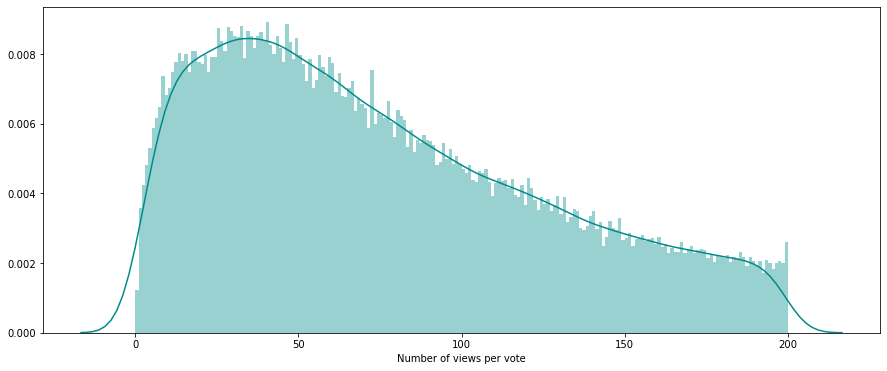

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# read in the csv file containing the data
kernels = pd.read_csv('../input/meta-kaggle/Kernels.csv')

# make a new column which is the ratio of views to votes for each notebook
kernels['views_per_vote'] = kernels['TotalViews']/kernels['TotalVotes']

# Some notebooks have 0 votes, and division by 0 results in inf: change these to a nan
kernels['views_per_vote'] = kernels['views_per_vote'].replace([np.inf, -np.inf], np.nan)
# now drop all the nan rows
kernels['views_per_vote'].dropna(inplace=True)

# finally make a histogram plot of this new column, 
# we shall arbitrarily set the cut off at 200 views per vote
plt.figure(figsize = (15,6))
sns.distplot(kernels['views_per_vote'], 
             bins=200, 
             kde_kws={"clip":(0,200)}, 
             hist_kws={"range":(0,200)},
             color='darkcyan', 
             axlabel="Number of views per vote");

### Conclusion: 
We should really develop more of a habit of voting for the work of our fellow data scientists: we have seen that on average only 2.5% of the readers actually upvote the notebook they read, and I find it very hard to believe that 97.5% of the notebooks one reads on kaggle are not worth voting for!